## OpenAI Assistant API

Chat-Completion-API based ChatBots vs Assistant-API based ChatBots:

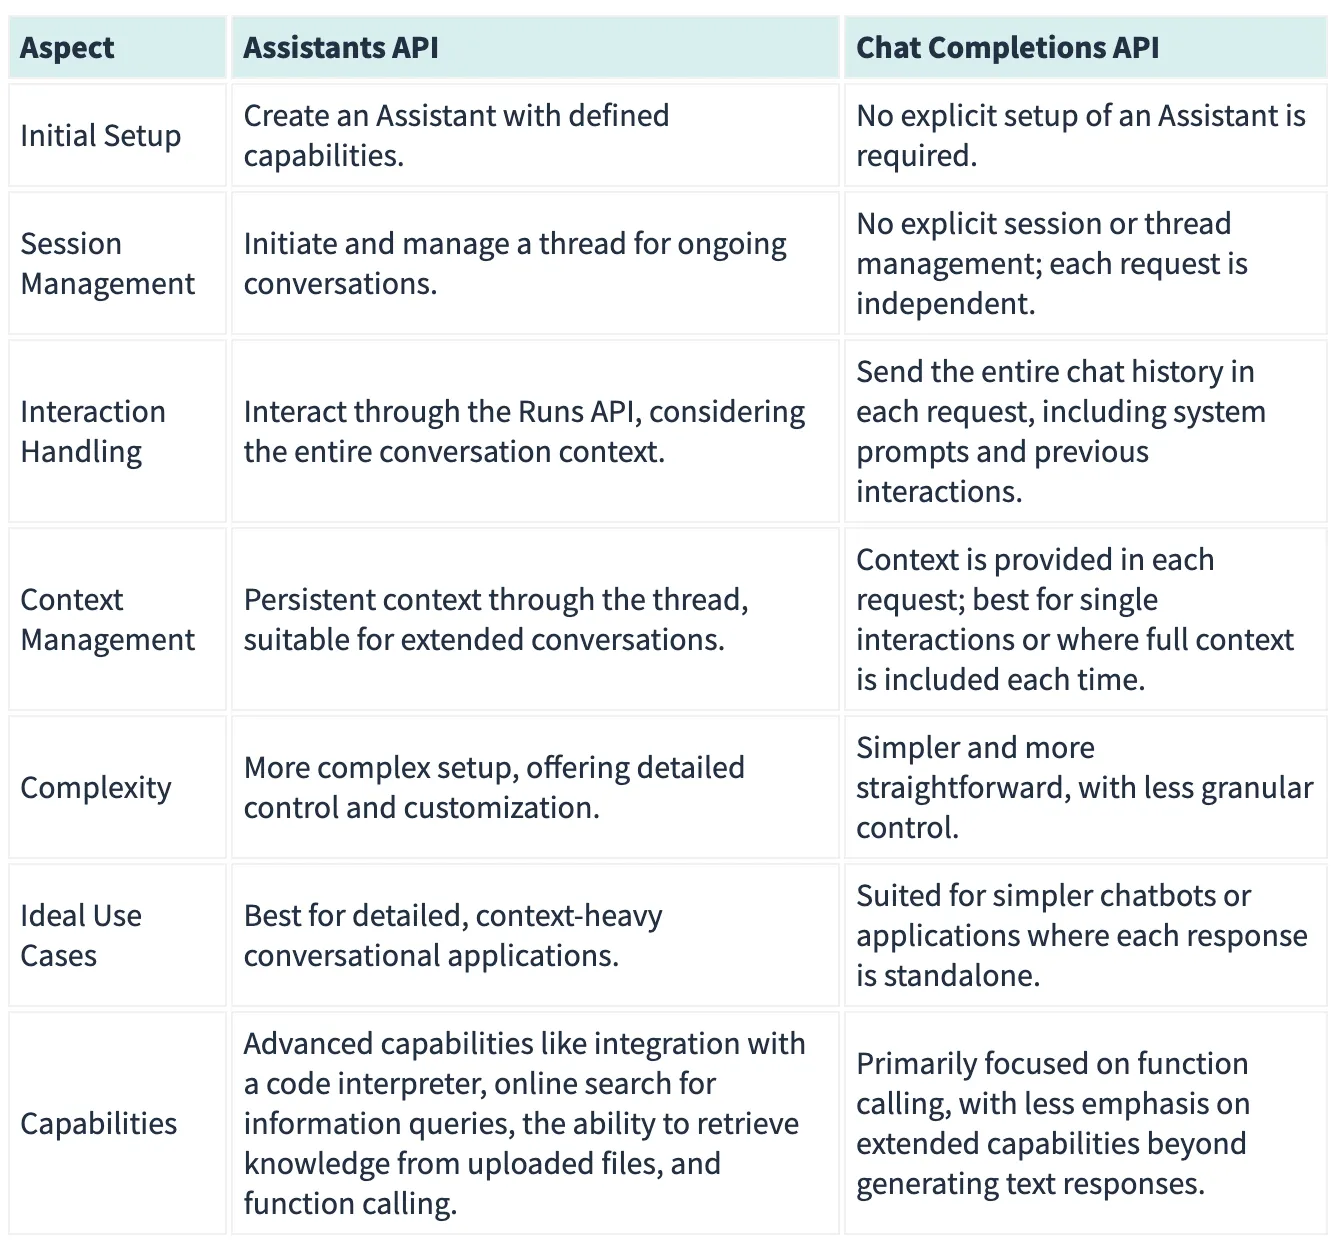

https://medium.com/leniolabs/exploring-openais-apis-assistants-vs-chat-completions-91525f73422c

The Assistants API currently supports three types of tools:

    Code Interpreter,
    Retrieval, and
    Function calling.
At a high-level, for a typical assistants API:

1. Create an Assistant in the API by defining its custom instructions and picking a model. 
    * If helpful, enable tools like Code Interpreter, Retrieval, and Function calling.
2. Create a Thread when a user starts a conversation.
3. Add Messages to the Thread as the user ask questions.
4. Run the Assistant on the Thread to trigger responses. 
    * This automatically calls the relevant tools.

Let's create and run an Assistant that uses Code Interpreter.

In [1]:
from openai import OpenAI
client = OpenAI()

### Step 1: Create an Assistant

https://platform.openai.com/docs/assistants/overview/step-1-create-an-assistant

In [2]:
assistant = client.beta.assistants.create(
    name="Math Teacher",
    model="gpt-4-1106-preview",
    instructions="You are a personal math teacher. Write and run code to answer math questions.",
    tools=[{"type": "code_interpreter"}]
)

### Step 2: Create a Thread

* It is recommended to create one Thread per user, as soon as the user initiates the conversation. 

* Pass any user-specific **context** and **files** in this thread **by creating Messages**.

https://platform.openai.com/docs/assistants/overview/step-2-create-a-thread

**A Thread represents a conversation.**

In [3]:
thread = client.beta.threads.create()

In [4]:
thread.id

'thread_9mFtDCaSGsRSkScLlLSFXlf6'

### Step 3: Add a Message to a Thread

https://platform.openai.com/docs/assistants/overview/step-3-add-a-message-to-a-thread

In [5]:
message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="I need to solve the equation `4x + 11 = 19`. Can you help me?"
)

In [6]:
client.beta.threads.messages.list(thread.id)

SyncCursorPage[ThreadMessage](data=[ThreadMessage(id='msg_tVtutfYo2fA0nYsPjolItPhw', assistant_id=None, content=[MessageContentText(text=Text(annotations=[], value='I need to solve the equation `4x + 11 = 19`. Can you help me?'), type='text')], created_at=1708766071, file_ids=[], metadata={}, object='thread.message', role='user', run_id=None, thread_id='thread_9mFtDCaSGsRSkScLlLSFXlf6')], object='list', first_id='msg_tVtutfYo2fA0nYsPjolItPhw', last_id='msg_tVtutfYo2fA0nYsPjolItPhw', has_more=False)

### Step 4: Run the Assistant

Just create a `Run` method that is instantiated from threads, with the given parameters of `thread.id` and `assistant.id`.

In [7]:
assistant.id

'asst_KJJETN3tPQgk3U9vEp70crxZ'

In [8]:
run = client.beta.threads.runs.create(
    thread_id=thread.id,
    assistant_id=assistant.id,
    instructions="Please address the user as Monaj. The user has a premium account."
)

In [23]:
run.id, run.status

('run_GxatmWoTQJXXhYshk6CfK5FG', 'completed')

### Step 5: Display the Assistant's Response

This creates a Run in a `queued` status. You can periodically retrieve the Run to check on its status to see if it has moved to `completed`.

In [24]:
run = client.beta.threads.runs.retrieve(
    thread_id=thread.id,
    run_id=run.id
)

In [25]:
run.id, run.status

('run_GxatmWoTQJXXhYshk6CfK5FG', 'completed')

In [26]:
messages = client.beta.threads.messages.list(
    thread_id=thread.id
)

In [27]:
messages

SyncCursorPage[ThreadMessage](data=[ThreadMessage(id='msg_hAM8M0MqIcYZS9mBjuASmBMy', assistant_id=None, content=[MessageContentText(text=Text(annotations=[], value='Now what is the squared root of `x`?'), type='text')], created_at=1708766102, file_ids=[], metadata={}, object='thread.message', role='user', run_id=None, thread_id='thread_9mFtDCaSGsRSkScLlLSFXlf6'), ThreadMessage(id='msg_srhGcTvohe3Z6kSX4cGr99WR', assistant_id='asst_KJJETN3tPQgk3U9vEp70crxZ', content=[MessageContentText(text=Text(annotations=[], value='The solution to the equation \\( 4x + 11 = 19 \\) is \\( x = 2 \\).'), type='text')], created_at=1708766089, file_ids=[], metadata={}, object='thread.message', role='assistant', run_id='run_GxatmWoTQJXXhYshk6CfK5FG', thread_id='thread_9mFtDCaSGsRSkScLlLSFXlf6'), ThreadMessage(id='msg_tVtutfYo2fA0nYsPjolItPhw', assistant_id=None, content=[MessageContentText(text=Text(annotations=[], value='I need to solve the equation `4x + 11 = 19`. Can you help me?'), type='text')], create

In [28]:
print(messages.data[0].content[0].text.value)

Now what is the squared root of `x`?


### Bonus: Adding further messages to the conversation

In [29]:
message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="Now what is the squared root of `x`?"
)

`run` object must be instantiated again:

In [34]:
run = client.beta.threads.runs.create(
    thread_id=thread.id,
    assistant_id=assistant.id,
    instructions="Please address the user as Monaj. The user has a premium account."
)

In [35]:
run = client.beta.threads.runs.retrieve(
    thread_id=thread.id,
    run_id=run.id
)

In [36]:
messages = client.beta.threads.messages.list(
    thread_id=thread.id
)

In [37]:
messages

SyncCursorPage[ThreadMessage](data=[ThreadMessage(id='msg_i71JZb8fwoA4SAFAhVDxdyZs', assistant_id='asst_KJJETN3tPQgk3U9vEp70crxZ', content=[MessageContentText(text=Text(annotations=[], value='The square root of \\( x \\) (where \\( x = 2 \\)) is approximately \\( 1.414 \\).'), type='text')], created_at=1708767118, file_ids=[], metadata={}, object='thread.message', role='assistant', run_id='run_v5O9oeI5oJeqZZ0TYqyHbGib', thread_id='thread_9mFtDCaSGsRSkScLlLSFXlf6'), ThreadMessage(id='msg_U62qSg3lqTi2iFmbtSR8YyM0', assistant_id=None, content=[MessageContentText(text=Text(annotations=[], value='Now what is the squared root of `x`?'), type='text')], created_at=1708766221, file_ids=[], metadata={}, object='thread.message', role='user', run_id=None, thread_id='thread_9mFtDCaSGsRSkScLlLSFXlf6'), ThreadMessage(id='msg_hAM8M0MqIcYZS9mBjuASmBMy', assistant_id=None, content=[MessageContentText(text=Text(annotations=[], value='Now what is the squared root of `x`?'), type='text')], created_at=17087

## Alternative Assistant API call

In-depth API reference:

https://platform.openai.com/docs/api-reference/assistants/createAssistant

In [104]:
import os
import json
import requests

In [118]:
headers = {
    'Authorization': f'Bearer {os.environ["OPENAI_API_KEY"]}',
    'Content-Type': 'application/json',
    'OpenAI-Beta': 'assistants=v1'
}

#### 1. Create an Assistant

In [119]:
assistant_data = {
    "instructions": "You are a personal math tutor. When asked a question, write and run Python code to answer the question.",
    "name": "Math Tutor",
    "tools": [{"type": "code_interpreter"}],
    "model": "gpt-4"
}
assistant_response = requests.post('https://api.openai.com/v1/assistants', headers=headers, data=json.dumps(assistant_data))

In [120]:
assistant_id = assistant_response.json()['id']

#### 2. Start a new conversation thread

In [121]:
thread_response = requests.post('https://api.openai.com/v1/threads', headers=headers)
thread_id = thread_response.json()['id']

#### 3. Send a message using the Runs API

In [122]:
run_data = {
    'assistant_id': assistant_id,
    'instructions': 'Hello, how are you?',
}
run_response = requests.post(f'https://api.openai.com/v1/threads/{thread_id}/runs', headers=headers, data=json.dumps(run_data))
run_id = run_response.json()['id']

#### 4. Retrieve the Assistant's Response

In [124]:
retrieve_run = requests.get(f'https://api.openai.com/v1/threads/{thread_id}/runs/{run_id}', headers=headers)
print(retrieve_run.json())

{'id': 'run_VoVaZC6nQENwCx607tzkN1iG', 'object': 'thread.run', 'created_at': 1708764767, 'assistant_id': 'asst_st7Volq8b5JH0RgDHc53O60B', 'thread_id': 'thread_d5jTAISLo7dGxTDo22zBYrnu', 'status': 'completed', 'started_at': 1708764767, 'expires_at': None, 'cancelled_at': None, 'failed_at': None, 'completed_at': 1708764769, 'required_action': None, 'last_error': None, 'model': 'gpt-4', 'instructions': 'Hello, how are you?', 'tools': [{'type': 'code_interpreter'}], 'file_ids': [], 'metadata': {}, 'usage': {'prompt_tokens': 102, 'completion_tokens': 27, 'total_tokens': 129}}


In [125]:
run_id

'run_VoVaZC6nQENwCx607tzkN1iG'

In [126]:
run_response.content

b'{"id":"run_VoVaZC6nQENwCx607tzkN1iG","object":"thread.run","created_at":1708764767,"assistant_id":"asst_st7Volq8b5JH0RgDHc53O60B","thread_id":"thread_d5jTAISLo7dGxTDo22zBYrnu","status":"queued","started_at":null,"expires_at":1708765367,"cancelled_at":null,"failed_at":null,"completed_at":null,"required_action":null,"last_error":null,"model":"gpt-4","instructions":"Hello, how are you?","tools":[{"type":"code_interpreter"}],"file_ids":[],"metadata":{},"usage":null}'